In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
urs = pd.read_csv('takehome_users.csv',encoding='latin-1')
eng = pd.read_csv('takehome_user_engagement.csv',encoding='latin-1')

In [0]:
# name, email not quantifiable, drop them
urs = urs.drop(['name','email'],axis=1)
urs.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [0]:
# convert strings to timestamps 
urs.creation_time = pd.to_datetime(urs.creation_time)
urs.last_session_creation_time = pd.to_datetime(urs.last_session_creation_time, unit='s')

In [0]:
urs.last_session_creation_time[:10]

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
5   2013-12-19 03:37:06
6   2012-12-20 13:24:32
7                   NaT
8                   NaT
9   2014-06-03 22:08:03
Name: last_session_creation_time, dtype: datetime64[ns]

In [0]:
type(urs.creation_time[1])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [0]:
eng.time_stamp = pd.to_datetime(eng.time_stamp)

In [0]:
urs.info()
# missing values: last_session_creation_time, invited_by_user_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [0]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [0]:
# extract week and year
eng['week_id'] = eng['time_stamp'].dt.strftime('%U-%Y')

In [0]:
eng.head()

,time_stamp,user_id,visited,week_id
0,2014-04-22 03:53:30,1,1,16-2014
1,2013-11-15 03:45:04,2,1,45-2013
2,2013-11-29 03:45:04,2,1,47-2013
3,2013-12-09 03:45:04,2,1,49-2013
4,2013-12-25 03:45:04,2,1,51-2013


In [0]:
# number of visits per week, grouped by user_id and week_id
cts = eng.groupby(['user_id', 'week_id']).size().reset_index().rename(columns={0:'count'})
cts.head()

,user_id,week_id,count
0,1,16-2014,1
1,2,01-2014,1
2,2,05-2014,2
3,2,06-2014,2
4,2,07-2014,1


In [0]:
# convert boolean to integer series
cts['adopted'] = pd.Series(cts['count'] >= 3).astype(int)
cts.head()

,user_id,week_id,count,adopted
0,1,16-2014,1,0
1,2,01-2014,1,0
2,2,05-2014,2,0
3,2,06-2014,2,0
4,2,07-2014,1,0


In [0]:
urs.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [0]:
# collect subset of adoption ids
adopted = list(cts[cts.adopted==True].user_id.unique())

In [0]:
# map subset list (adopted) from cts df to users df adopted column using object_id, since
# the list is boolean, mapping only to a subset of elmts in object_id will make elmts
# with a successful mapping True and all other elmts False
urs['adopted'] = urs.object_id.apply(lambda x: x in adopted).astype(int)

In [0]:
urs.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [0]:
df = urs.copy()

In [0]:
# let's keep the nans in creation_time and last_session_creation_time

df['creation_day'] = df.creation_time.dt.day
df['last_session_creation_day'] = df.last_session_creation_time.dt.day

df['creation_week'] = df.creation_time.dt.week
df['last_session_creation_week'] = df.last_session_creation_time.dt.week

df['creation_month'] = df.creation_time.dt.month
df['last_session_creation_month'] = df.last_session_creation_time.dt.month

In [0]:
# vif did not accept nans, so fillna(0), possibly label encode if prediction is poor

df['creation_day'] = df['creation_day'].fillna(0)
df['last_session_creation_day'] = df['last_session_creation_day'].fillna(0)

df['creation_week'] = df['creation_week'].fillna(0)
df['last_session_creation_week'] = df['last_session_creation_week'].fillna(0)

df['creation_month'] = df['creation_month'].fillna(0)
df['last_session_creation_month'] = df['last_session_creation_month'].fillna(0)

In [0]:
df.last_session_creation_month.unique()

array([ 4.,  3.,  5.,  1., 12.,  0.,  6., 10.,  2.,  8.,  9., 11.,  7.])

In [0]:
# add column after converting to boolean integer
df['invited'] = df.invited_by_user_id.notnull().astype(int)

In [0]:
df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_day,last_session_creation_day,creation_week,last_session_creation_week,creation_month,last_session_creation_month,invited
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,22,22.0,17,17.0,4,4.0,1
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0,15,31.0,46,14.0,11,3.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,19,19.0,12,12.0,3,3.0,1
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,21,22.0,21,21.0,5,5.0,1
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,17,22.0,3,4.0,1,1.0,1


In [0]:
from sklearn import preprocessing as pp

In [0]:
# label encode some of our categorical vars 
encoder = pp.LabelEncoder()

In [0]:
df['creation_source_labs'] = encoder.fit_transform(df['creation_source'])

In [0]:
encoder.classes_

array(['GUEST_INVITE', 'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [0]:
# drop columns after previous transformations 
df = df.drop(['creation_source','creation_time','last_session_creation_time',
              'invited_by_user_id'],axis=1).set_index('object_id')

In [0]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_day,last_session_creation_day,creation_week,last_session_creation_week,creation_month,last_session_creation_month,invited,creation_source_labs
object_id,,,,,,,,,,,,
1,1,0,11,0,22,22.0,17,17.0,4,4.0,1,0
2,0,0,1,0,15,31.0,46,14.0,11,3.0,1,1
3,0,0,94,0,19,19.0,12,12.0,3,3.0,1,1
4,0,0,1,0,21,22.0,21,21.0,5,5.0,1,0
5,0,0,193,0,17,22.0,3,4.0,1,1.0,1,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 12 columns):
opted_in_to_mailing_list       12000 non-null int64
enabled_for_marketing_drip     12000 non-null int64
org_id                         12000 non-null int64
adopted                        12000 non-null int64
creation_day                   12000 non-null int64
last_session_creation_day      12000 non-null float64
creation_week                  12000 non-null int64
last_session_creation_week     12000 non-null float64
creation_month                 12000 non-null int64
last_session_creation_month    12000 non-null float64
invited                        12000 non-null int64
creation_source_labs           12000 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1.2 MB


In [0]:
# get ready for graphs and modeling
X = df.drop(['adopted'],axis=1)
y = df['adopted']
df.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'adopted', 'creation_day', 'last_session_creation_day', 'creation_week',
       'last_session_creation_week', 'creation_month',
       'last_session_creation_month', 'invited', 'creation_source_labs'],
      dtype='object')

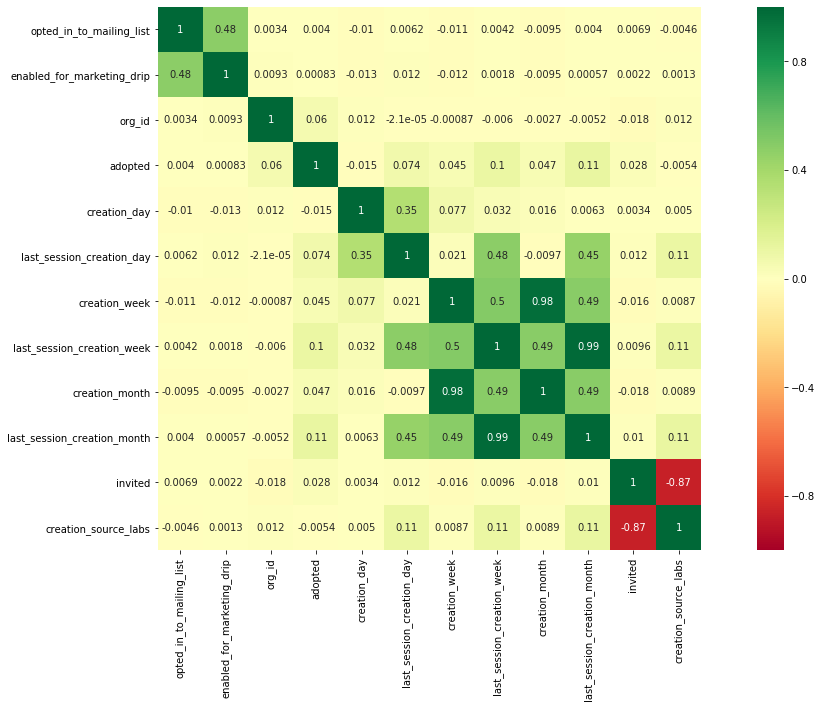

In [0]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),square=True,annot=True,cmap='RdYlGn',vmin=-1, vmax=1)
# correlate columns of interest: enabled_for_marketing_drip, opted_in_to_mailing_list, creation_source_labs, invite, 
# and creation time in general
# vif is the next measure to pursue 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# convert features to array
x = np.array(X, dtype=float)

# generate vif in df
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
6,127.961951,last_session_creation_week
8,125.356120,last_session_creation_month
7,98.782192,creation_month
5,95.001321,creation_week
3,5.023907,creation_day
10,4.398645,creation_source_labs
4,3.911428,last_session_creation_day
9,3.430392,invited
2,2.211666,org_id
0,1.728596,opted_in_to_mailing_list


In [0]:
# drop some creation periods since multicollinearity will become an issue in modeling 
df = df.drop(['last_session_creation_day','creation_day'],axis=1)

In [0]:
# drop ['adoption']
X = df.drop(['adopted'],axis=1)
y = df['adopted']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [0]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_trainC,X_testC,y_trainC,y_testC = train_test_split(X,y,test_size=0.2,random_state=7)

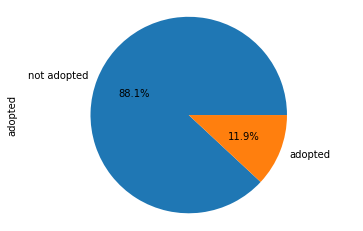

In [0]:
# always check the distributions for sampling purposes
df['adopted'].value_counts().plot(kind='pie',labels=['not adopted','adopted'],autopct='%1.1f%%')
_ = plt.axis('equal')

In [0]:
# running random forest first time around w/o resampling gave train accuracy: 0.12971 test accuracy: 0.85458, 
# so we will resample using smote. it supposed to work for continuous and categorical vars
# the big issue is the total number of adopted is 12%

from imblearn.over_sampling import SMOTE

X_train, y_train= SMOTE().fit_resample(X_train, y_train)

#RANDOM FOREST

In [0]:
# 30 - 60 estimators
rf = RandomForestClassifier(n_estimators=30, random_state=4)

# cross-validation
cv_rf = cross_val_score(rf, X_train, y_train, cv=5,scoring='f1')

# train model
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

In [0]:
# accuracy

print("train accuracy:",format(np.mean(cv_rf),'.5f'))
print("test accuracy:",format(metrics.accuracy_score(y_test, y_pred),'.5f'))

train accuracy: 0.97233
test accuracy: 0.96375


Text(0.5, 1, 'Confusion Matrix')

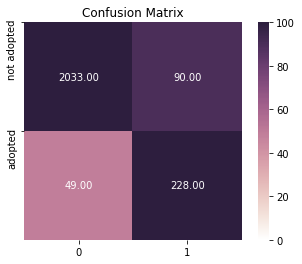

In [0]:
# confusion matrix 

fig = plt.figure()

plt.clf()
cmat = confusion_matrix(y_test, y_pred)

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(cmat, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

plt.yticks([0,1], ['not adopted','adopted'])

plt.title('Confusion Matrix')

In [0]:
print(classification_report(y_test,y_pred))
# recall = tp/tp+fn => tp+fn = actual num pos => gives an idea of desired class accuracy of type ii error
# precision = tp/tp+fp => tp+fp = predicted num pos => gives idea of desired class accuracy of type i

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2123
           1       0.85      0.83      0.84       277

    accuracy                           0.96      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.96      0.96      0.96      2400



In [0]:
from sklearn.ensemble import AdaBoostClassifier

#ADA BOOST 

In [0]:
ab = AdaBoostClassifier(n_estimators=40, random_state=2)

# cross-validation
cv_ab = cross_val_score(ab, X_train, y_train, cv=5,scoring='f1')

# train model
ab.fit(X_train, y_train)

# predict on test data
y_pred = ab.predict(X_test)

In [0]:
# accuracy

print("train acc:",format(np.mean(cv_ab),'.5f'))
print("test acc:",format(metrics.accuracy_score(y_test, y_pred),'.5f'))

train acc: 0.94558
test acc: 0.94208


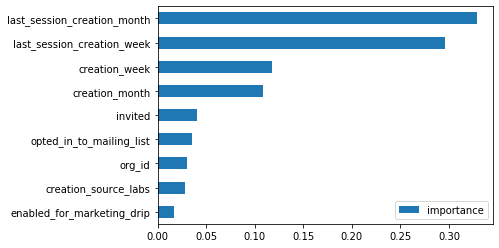

In [0]:
# checking feature importance

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_trainC.columns,
                                   columns=['importance']).sort_values('importance',ascending=True)

feature_importances.plot(kind='barh')

In [0]:
# last_session_creation has the most impact, both week and month

417

In [0]:
df.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'adopted', 'creation_week', 'last_session_creation_week',
       'creation_month', 'last_session_creation_month', 'invited',
       'creation_source_labs'],
      dtype='object')

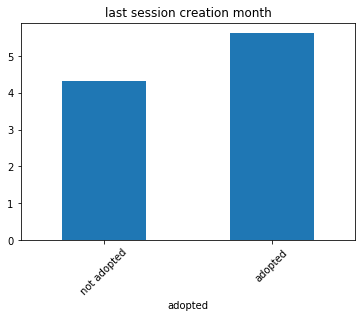

In [0]:
# graph last session log counts by month between not adopted and adopted users 

_ = df.groupby('adopted')['last_session_creation_month'].mean().plot(kind='bar')
_ = plt.title('last session creation month')
_ = plt.xticks([0,1],['not adopted','adopted'],rotation=45)

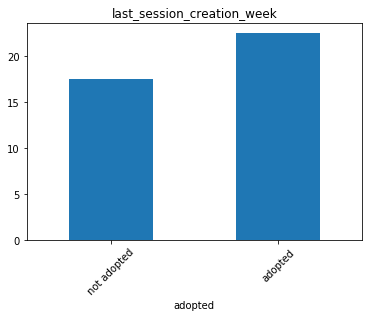

In [0]:
# same as above on a weekly period

_ = df.groupby('adopted')['last_session_creation_week'].mean().plot(kind='bar')
_ = plt.title('last_session_creation_week')
_ = plt.xticks([0,1],['not adopted','adopted'],rotation=45)

In [0]:
# whether you were enabled for marketing drip or invited did not influence adoption use
# last_session_creation_time was the most impactful: the month of may being the most influential

In [0]:
df.last_session_creation_month.unique()

array([ 4.,  3.,  5.,  1., 12.,  0.,  6., 10.,  2.,  8.,  9., 11.,  7.])